# Lecture 4

In [1]:
from typing import Tuple, Any

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor# you may need to install XGBoost
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# helpers
from src.helpers import feature_importance_plot

sns.set(rc={"figure.figsize": (20,10)})

C:\Users\terje\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")

Defining target and features

In [3]:
target = users_data["total_amount_usd"]
features = users_data.drop(columns="total_amount_usd")

C:\Users\terje\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount_usd'>

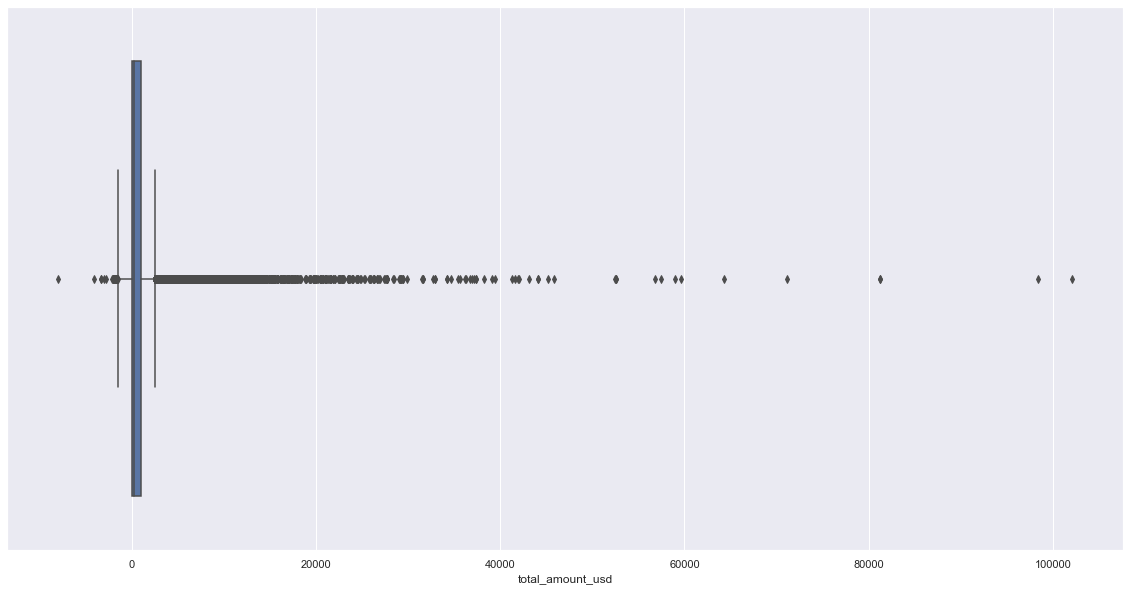

In [4]:
sns.boxplot(target)

Splitting dataset

In [5]:
def split_and_print_shape(features: pd.DataFrame, target: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

    print(f"X_train shape {X_train.shape}")
    print(f"X_test shape {X_test.shape}")
    print(f"y_train shape {y_train.shape}")
    print(f"y_test shape {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = split_and_print_shape(features, target)

X_train shape (36143, 36)
X_test shape (9036, 36)
y_train shape (36143,)
y_test shape (9036,)


## Modelling

In [7]:
# Build the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions and call this variable y_pred_dt
y_pred_dt = dt.predict(X_test)

In [8]:
def train_model_print_5(model, X_train=X_train, X_test=X_test,
                        y_train=y_train, y_test=y_test):
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("first five predicted values:", y_pred[0:5])
    print("first five actual values:", list(y_test[0:5]))

    return model, y_pred

In [9]:
model, y_pred = train_model_print_5(DecisionTreeRegressor)

first five predicted values: [5511. 2296. 2455. 1450.  952.]
first five actual values: [3025.0, 197.0, 5057.0, 378.0, 1230.0]


### Visualise tree

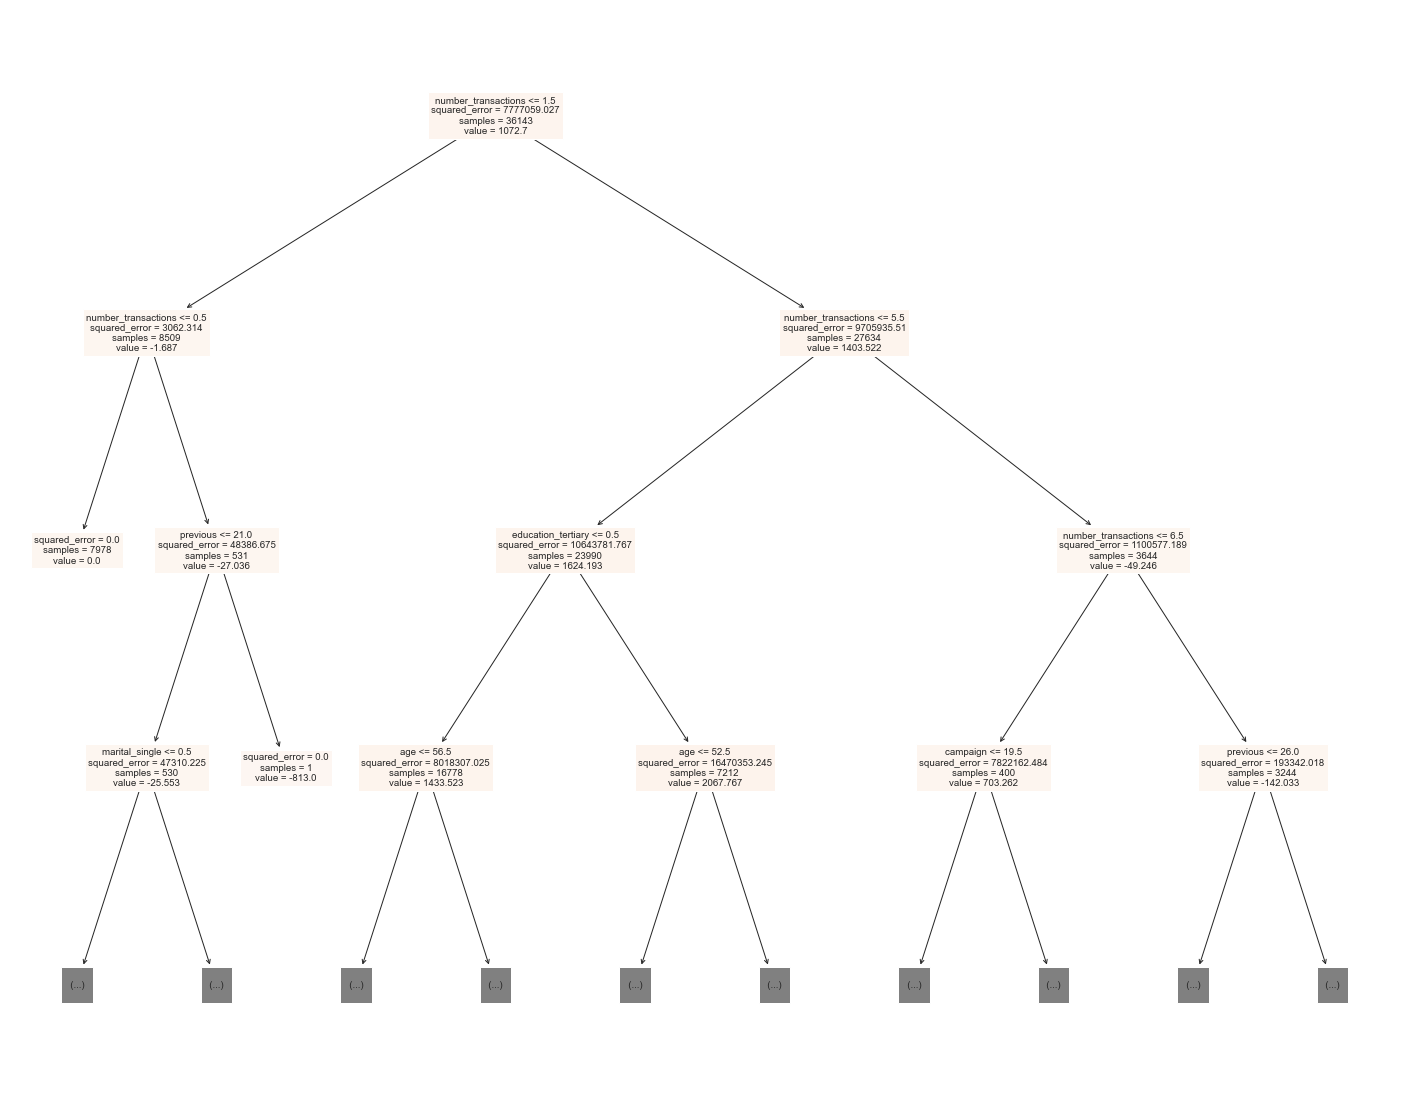

In [10]:
from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(dt,
                   feature_names = list(X_train.columns),
                   max_depth = 3,
                   filled = True)


### Evaluate model

In [28]:
def evaluate_model(y_test=y_test, y_pred=y_pred, model="reg"):

    if model == "reg":
        r2 = r2_score(y_test, y_pred)
        print("R2:", round(r2, 2))
        mae = mean_absolute_error(y_test, y_pred)
        print("Mean Absolute Error:", round(mae))
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error:", round(mse))


In [29]:
evaluate_model()

R2: -0.84
Mean Absolute Error: 1521
Mean Squared Error: 13041634


### Feature importance

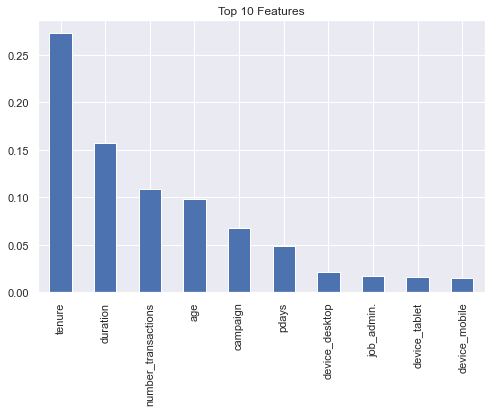

In [14]:
feature_importance_plot(model, X_train, n=10)

## Random forest

In [31]:
rff_model, rff_y_pred = train_model_print_5(RandomForestRegressor)

first five predicted values: [2476.01 2270.88 1403.13  498.66 2826.75]
first five actual values: [3025.0, 197.0, 5057.0, 378.0, 1230.0]


In [32]:
evaluate_model(y_pred=rff_y_pred, model="reg")

R2: 0.01
Mean Absolute Error: 1193
Mean Squared Error: 7022860


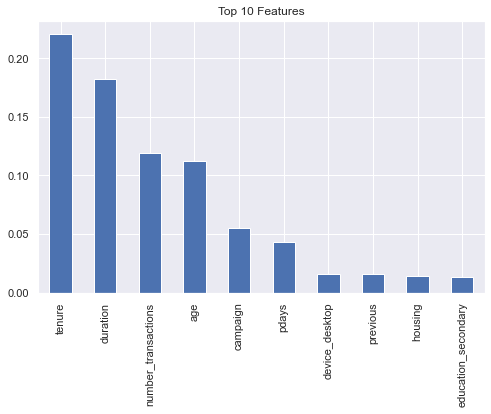

In [25]:
feature_importance_plot(rff_model, X_train, n=10)

## XGBoost

In [33]:
xg_model, xg_pred = train_model_print_5(XGBRegressor)

C:\Users\terje\miniconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


first five predicted values: [1361.056  1613.0988 1383.737  1300.3186 2148.0566]
first five actual values: [3025.0, 197.0, 5057.0, 378.0, 1230.0]


In [34]:
evaluate_model(y_pred=xg_pred, model="reg")

R2: 0.03
Mean Absolute Error: 1171
Mean Squared Error: 6892208


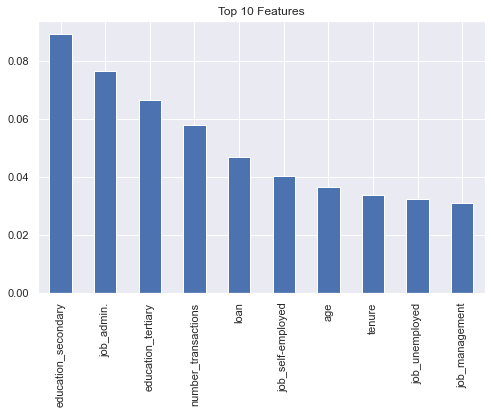

In [35]:
feature_importance_plot(xg_model, X_train, n=10)